In [172]:
import numpy as _np
import xarray as _xr
from atmPy.data_archives.arm import _tools
from atmPy.data_archives.arm import sites as armsites
from atmPy.aerosols.size_distribution import sizedistribution as _sd
from atmPy.general import timeseries as _ts
import atmPy

In [173]:
def open_path(path, window = None, average = None, verbose = True):
    """

    Parameters
    ----------
    path
    start_time
    end_time
    average: tuple [None]
        The purpose of this is to keep the memory usage low in case a lower reolution is required. E.g. (60, 's')

    Returns
    -------

    """
    def read_aosaps(file, verbose = False):
        ds = _xr.open_dataset(file, autoclose=True)
        aods = pd.DataFrame()
        wavelengths = pd.DataFrame()
        for i in range(1,6):
            aod = ds['aerosol_optical_depth_filter{}'.format(i)].to_pandas()
            wl_measured = ds.attrs['filter{}_CWL_measured'.format(i)]
            wl_nominal = ds.attrs['filter{}_CWL_nominal'.format(i)]
            aods[wl_nominal] = aod
            wls  = {'wl_measured': float(wl_measured.split()[0]),
             'wl_nominal': float(wl_nominal.split()[0])}
            wavelengths = wavelengths.append(pd.DataFrame(wls, index = [i]), sort = True)
        wavelengths.index.name = 'filter'

        out = {}
        out['aods'] = aods
        out['wavelengths'] = wavelengths
        if verbose:
            pass
        return out

    # start_time, end_time  = window
    files = _tools.path2filelist(path=path, window = window, product='mfrsraod1mich', suffix='.cdf')
    if verbose:
        print('Opening {} files.'.format(len(files)))
        print(_tools.path2info(files[0]))
    
    data_dist = None
    for file in files:
        out = read_aosaps(file)
#         return out
#         break
        ddt = _ts.TimeSeries(out['aods'])
        if average:
            ddt = ddt.average_time(average)
        ddt = ddt.data
        if isinstance(data_dist, type(None)):
            data_dist = ddt
            wavelengths = out['wavelengths']
        else:
            data_dist = data_dist.append(ddt, sort=True)
            # make sure wavelength did not change
            assert (_np.all(_np.equal(wavelengths, out['wavelengths'])))

#     dist = _sd.SizeDist_TS(data_dist, binedges, 'dNdlogDp', ignore_data_gap_error=True)
    dist = _ts.TimeSeries(data_dist)
    dist.file_info = _tools.path2info(files[0])
    dist.site = armsites.site_from_file_info(dist.file_info)
#     dist.site_info = [site for site in atmPy.data_archives.arm.sites.sites_list if site['Site Code'] == dist.file_info['site'] and dist.file_info['facility'] == facility][0]
#     dist.site = atmPy.general.measurement_site.Station(**site_info)
    return dist

In [174]:
reload(atmPy.data_archives.arm._tools)

<module 'atmPy.data_archives.arm._tools' from '/Users/htelg/prog/atm-py/atmPy/data_archives/arm/_tools.py'>

In [177]:
fname = '/Volumes/HTelg_4TB_Backup/arm_data/SGP/mfrsraod1michC1.s1/'
ds = open_path(fname, window=('20161115', '20161116'))
# atmPy.data_archives.arm._tools.path2filelist(fname, verbose=True, suffix='.cdf')

Opening 2 files.
{'suffix': '.cdf', 'product': 'mfrsraod1mich', 'facility': 'C1', 'site': 'sgp', 'timestamp': Timestamp('2016-11-15 00:00:00'), 'qc_level': 's1'}


In [176]:
reload(atmPy.data_archives.arm.sites)

<module 'atmPy.data_archives.arm.sites' from '/Users/htelg/prog/atm-py/atmPy/data_archives/arm/sites.py'>

In [164]:
def site_from_file_info(file_info):
    site_info = [site for site in atmPy.data_archives.arm.sites.sites_list if site['Site Code'].upper() == file_info['site'].upper() and site['facility'] == file_info['facility']][0]
    site = atmPy.general.measurement_site.Station(**site_info)
    return site

In [167]:
site_from_file_info(ds.file_info).lon

-97.485

In [111]:
from atmPy.aerosols.physics import column_optical_properties

In [129]:
reload(column_optical_properties)
reload(atmPy.data_archives.arm.sites)

<module 'atmPy.data_archives.arm.sites' from '/Users/htelg/prog/atm-py/atmPy/data_archives/arm/sites.py'>

In [130]:
column_optical_properties.AOD_AOT()

In [132]:
sitec = 'SGP'
facility = 'C1'
[site for site in atmPy.data_archives.arm.sites.sites_list if site['Site Code'] == sitec and site['facility'] == facility]

[{'active': True,
  'Site Code': 'SGP',
  'lat': 36.605,
  'lon': -97.485,
  'Surface Type': 'Rangeland (Sandy)',
  'name': 'Central Facility, Lamont, OK',
  'alt': 318.0,
  'facility': 'C1',
  'abbreviation': 'C1'}]

In [128]:
site = atmPy.data_archives.arm.sites.sites_list[1]
site['facility'] == facility

{'active': False,
 'Site Code': 'SGP',
 'lat': 37.627,
 'lon': -96.538,
 'Surface Type': 'Awaiting information',
 'name': 'Beaumont, KS (ABLE)',
 'alt': 0.0,
 'facility': 'A2',
 'abbreviation': 'A2'}

# xarray

In [79]:
fname = '/Volumes/HTelg_4TB_Backup/arm_data/SGP/mfrsraod1michC1.s1/sgpmfrsraod1michC1.s1.20161115.000000.cdf'
ds = xr.open_dataset(fname)

In [88]:
df = pd.DataFrame()
df['bls'] = ds['aerosol_optical_depth_filter1'].to_pandas()
df

,bls
time,
2016-11-15 00:00:00,NaN
2016-11-15 00:00:20,NaN
2016-11-15 00:00:40,NaN
2016-11-15 00:01:00,NaN
2016-11-15 00:01:20,NaN
2016-11-15 00:01:40,NaN
2016-11-15 00:02:00,NaN
2016-11-15 00:02:20,NaN
2016-11-15 00:02:40,NaN


In [12]:
ds.filter1_CWL_nominal

'414.7 nm'

In [17]:
ds.aerosol_optical_depth_filter1.to_pandas()

time
2016-11-15 00:00:00   NaN
2016-11-15 00:00:20   NaN
2016-11-15 00:00:40   NaN
2016-11-15 00:01:00   NaN
2016-11-15 00:01:20   NaN
2016-11-15 00:01:40   NaN
2016-11-15 00:02:00   NaN
2016-11-15 00:02:20   NaN
2016-11-15 00:02:40   NaN
2016-11-15 00:03:00   NaN
2016-11-15 00:03:20   NaN
2016-11-15 00:03:40   NaN
2016-11-15 00:04:00   NaN
2016-11-15 00:04:20   NaN
2016-11-15 00:04:40   NaN
2016-11-15 00:05:00   NaN
2016-11-15 00:05:20   NaN
2016-11-15 00:05:40   NaN
2016-11-15 00:06:00   NaN
2016-11-15 00:06:20   NaN
2016-11-15 00:06:40   NaN
2016-11-15 00:07:00   NaN
2016-11-15 00:07:20   NaN
2016-11-15 00:07:40   NaN
2016-11-15 00:08:00   NaN
2016-11-15 00:08:20   NaN
2016-11-15 00:08:40   NaN
2016-11-15 00:09:00   NaN
2016-11-15 00:09:20   NaN
2016-11-15 00:09:40   NaN
                       ..
2016-11-15 23:50:00   NaN
2016-11-15 23:50:20   NaN
2016-11-15 23:50:40   NaN
2016-11-15 23:51:00   NaN
2016-11-15 23:51:20   NaN
2016-11-15 23:51:40   NaN
2016-11-15 23:52:00   NaN
2016-11

In [55]:
aods = pd.DataFrame()
wavelengths = pd.DataFrame()
for i in range(1,6):
    aod = ds.variables['aerosol_optical_depth_filter{}'.format(i)]
    wl_measured = ds.attrs['filter{}_CWL_measured'.format(i)]
    wl_nominal = ds.attrs['filter{}_CWL_nominal'.format(i)]
    aods[wl_nominal] = aod
    wls  = {'wl_measured': float(wl_measured.split()[0]),
     'wl_nominal': float(wl_nominal.split()[0])}
    wavelengths = wavelengths.append(pd.DataFrame(wls, index = [i]), sort = True)
wavelengths.index.name = 'filter'


In [56]:
wavelengths

,wl_measured,wl_nominal
filter,,
1,414.7,415.0
2,497.0,500.0
3,614.1,615.0
4,671.1,673.0
5,867.6,870.0


In [52]:
float(wl_measured.split()[0])

867.6

In [43]:
wls  = {'wl_measured': wl_measured,
 'wl_nominal': wl_nominal}
wavelengths.append(pd.DataFrame(wls, index = [i]), sort = True)

,wl_measured,wl_nominal
5,867.6 nm,870 nm


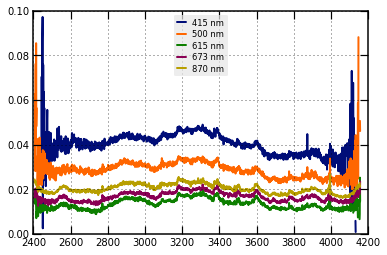

In [29]:
aods.plot()